# **Bussiness Analytics**

### Impact of missing defect
Cost of weld defects
In a properly functioning welding operation, costs are typically broken down like this:

Labor: 85 % <br />
Filler metals: 6 % <br />
Raw materials: 4 %<br />
Shielding gas: 3 %<br />
Electric power: 2 %<br />
When a missed or defective weld goes undetected, these costs escalate at every stage in the welding operation and beyond. There are six key stages to consider the impact of a missed weld. 

**Stage one: weld cell**

Identifying a missed or defective weld in the weld cell is ideal and smaller parts are generally simpler and less expensive to inspect and resolve than with larger components. 
Operators can usually add a missed weld easily — and at minimal cost. Weld defects may be slightly more difficult to address since the weld must be removed and reworked. This typically costs two to three times that of the original fabrication. 

**Stage two: subsequent weld cell**

In operations with sub-assembly requirements, there may be additional weld cells to complete part production. Missed or defective welds found here have to be returned to the first weld cell if the operator does not have the equipment or qualifications to make adjustments. 

If the part is large, the company could accumulate downtime and additional costs for moving it. For lean, “just in time” welding operations, returning a part to the weld cell could create a bottleneck while the operator is forced to wait on a part. 

**Stage three: paint booth**

Missed or defective welds identified after painting require the paint to be removed and the part returned to the original weld cell. These redundancies result in cost for labor and rework and for the paint. For larger components requiring painting all at once, that cost could be significant.

**Stage four: final product assembly**

If missed or defective welds reach this stage, the part will need to undergo three steps: disassembly, paint removal and fabrication. A dedicated employee with a mobile welding cart could resolve the problem or a welding operator from the weld cell could make the repair. Both add to downtime and labor costs, and a mobile welding cart requires a capital investment for equipment that may only be used periodically.

**Stage five: distributor or customer identification**

If a distributor identifies a missed or defective weld, a company could accumulate costs to remove the product and deliver a new one. Those costs could be substantial for something like a piece of heavy equipment. Deploying a mobile welding unit or having a qualified distributor contact make repairs may be an option, but a costly one. 
If a customer detects a problem with the finished product, it can lead to warranty claims and require removal and replacement of the product. 

It may also cause a company to lose contracts and put their brand reputation at risk if missed or defective welds occur frequently. 

**Stage six: liability claim**

Property damage or bodily injury is the most significant consequence of a missed or defective weld — and one that far exceeds any financial ramifications, although those still exist. Liability claims can generate significant expenses and too many could lead to future loss of business and profits. Again, these effects are always secondary to a catastrophic event, but companies must consider them as due course of operating a successful business.


So its best in to stop these effects at the earliest possible stages to avoid compounding of the losses and in turn save on capital for the company.

In [1]:
#importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

### Data Loading and Preprocessing

In [2]:
# we have changed the dataset name for our convinience
train = pd.read_csv("/Users/raunakpandey/tensorflow-test/weldright/Submission/NEWDATA.csv")

/var/folders/56/8qxbxkps1g73zstry__01qrc0000gn/T/ipykernel_42318/1742374449.py:2: DtypeWarning:

Columns (0,2,3,6,7,8,9,10,11,22,27,32,37,42,47,52,57,62,67,72,77,82,87) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
train.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,(Office id of employee),(Welding machine name),(Project order number),(This captures the activity to be performed by...,(date of activity),(Timestamp for the activity),(In Ampere),(Relative humidity in %),(in degree celsius),(in liters per min (LPM)),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,383138,TWLD23,E10002436,40,22-08-2022,10:44:10:129,27.85,84,24,3.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,383138,TWLD23,E10002436,40,22-08-2022,10:44:10:630,27.38,84,24,3.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,383138,TWLD23,E10002436,40,22-08-2022,10:44:11:127,26.89,84,24,3.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,383138,TWLD23,E10002436,40,22-08-2022,10:44:11:630,27.86,84,24,3.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train=train.drop([0])
#dropping the first row since it only contains a description of the columns and doesnt help while operating on the data

In [5]:
train.drop(train.iloc[:, 13:88], inplace=True, axis=1)
#removing the noise containing rows filled with Nan values from the data for further processes

In [6]:
train.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,383138,TWLD23,E10002436,40,22-08-2022,10:44:10:129,27.85,84,24,3.12,30.1,9.122,No Defect
2,383138,TWLD23,E10002436,40,22-08-2022,10:44:10:630,27.38,84,24,3.08,30.1,9.129,No Defect
3,383138,TWLD23,E10002436,40,22-08-2022,10:44:11:127,26.89,84,24,3.08,29.3,9.17,No Defect
4,383138,TWLD23,E10002436,40,22-08-2022,10:44:11:630,27.86,84,24,3.05,29.3,9.104,No Defect
5,383138,TWLD23,E10002436,40,22-08-2022,10:44:12:132,27.81,84,24,3.05,29.3,9.045,No Defect


In [7]:
train.isnull().sum().sort_values(ascending = False)

Current               3
Employee Code         0
Machine               0
Production            0
Order Operation No    0
Date                  0
Time                  0
Humidity              0
Temperature           0
Flow                  0
Job Temp              0
Voltage               0
Defect                0
dtype: int64

In [8]:
train['Machine'].value_counts()

TWLD23    827534
Name: Machine, dtype: int64

In [9]:
train['Machine'].unique()

array(['TWLD23'], dtype=object)

#### Only one kind of machine has been used in the process so it cannot be associated with the cause of the defects in the welding process.

In [10]:
train['Production'].unique()

array(['E10002436', 'Test coopan', '-15003217', -15003217, -150033027,
       15003062, '15003062', 'E15003220', 'E15002881', 'E50006711',
       'E15003200', 'E15003202', 'E15003056', 'E15002963', 'E10002437',
       'E15003219', 'E15003201', 'E15002965', 'E15002966', '#NAME?', '-'],
      dtype=object)

In [11]:
#define values
values = ['Test coopan','#NAME?','-']

#drop rows that contain any value in the list
train = train[train.Production.isin(values) == False]

In [12]:
train['Production'].unique()

array(['E10002436', '-15003217', -15003217, -150033027, 15003062,
       '15003062', 'E15003220', 'E15002881', 'E50006711', 'E15003200',
       'E15003202', 'E15003056', 'E15002963', 'E10002437', 'E15003219',
       'E15003201', 'E15002965', 'E15002966'], dtype=object)

In [13]:
old_values = ['E10002436','-15003217', -15003217, -150033027,
       15003062, '15003062', 'E15003220', 'E15002881', 'E50006711',
       'E15003200', 'E15003202', 'E15003056', 'E15002963', 'E10002437',
       'E15003219', 'E15003201', 'E15002965', 'E15002966']
new_values = ['E10002436', 'E15003217','E15003217','E150033027','E15003062','E15003062',
             'E15003220','E15002881', 'E50006711','E15003200', 'E15003202', 'E15003056', 'E15002963', 'E10002437',
            'E15003219', 'E15003201', 'E15002965', 'E15002966']

train['Production']=train.Production.replace(old_values, new_values)

In [14]:
train['Production'].unique()

array(['E10002436', 'E15003217', 'E150033027', 'E15003062', 'E15003220',
       'E15002881', 'E50006711', 'E15003200', 'E15003202', 'E15003056',
       'E15002963', 'E10002437', 'E15003219', 'E15003201', 'E15002965',
       'E15002966'], dtype=object)

#### We have cleaned the data in the production methods column now leaving us with 16 different production processes to analyse further.

In [15]:
train['Employee Code'].unique()

array(['383138', '0', '394269', 394269, 383138, 0, 97346, 394965, 391342,
       394365, 382617], dtype=object)

In [16]:
train['Date'].unique()

array(['22-08-2022', '23-08-2022', '24-08-2022', '26-08-2022',
       '27-08-2022', '29-08-2022', '30-08-2022', '01-09-2022',
       '02-09-2022', '03-09-2022', '05-09-2022', '06-09-2022',
       '07-09-2022', '08-09-2022', '09-09-2022', '10-09-2022',
       '12-09-2022'], dtype=object)

In [17]:
train.dropna(inplace=True)

In [18]:
train.drop(['Machine'], axis=1,inplace=True)



#train['Order Operation No'] = train['Order Operation No'].astype(int)
train['Current'] = train['Current'].astype(float)
train['Humidity'] = train['Humidity'].astype(float)
train['Temperature'] = train['Temperature'].astype(float)
train['Flow'] = train['Flow'].astype(float)
train['Job Temp'] = train['Job Temp'].astype(float)
train['Voltage'] = train['Voltage'].astype(float)
train['Defect'] = train['Defect'].astype(str)
train['Date'] = train['Date'].astype(str)

In [19]:
train['date'] = train['Date'].str[:2]
train['month']=train.Date.str.slice(3,5)
train.drop(['Date'], axis=1,inplace=True)

In [20]:
train['Defectinitials'] = train['Defect'].str[:2]

In [21]:
train['Defectinitials'].unique()

array(['No', 'Po', 'Tu'], dtype=object)

In [22]:
train['Defectinitials'].value_counts()

No    473439
Tu      2745
Po       694
Name: Defectinitials, dtype: int64

In [23]:
train['Order Operation No'].value_counts()

240     276330
180      64165
180-     53238
40       39068
240      20413
30       15473
40        8191
Name: Order Operation No, dtype: int64

In [24]:
old_values = ['Tu', 'Po']
new_values = ['Tu', 'Tu']

train['Defectinitials']=train.Defectinitials.replace(old_values, new_values)

#### Since we only wish to analyse if there is a defect or not irrespective of its type, we will group both the defects under the same name for current analysis.

In [25]:
train['Defectinitials'].unique()

array(['No', 'Tu'], dtype=object)

In [26]:
train.rename(columns={'Order Operation No': 'operationnumber',}, inplace=True)

In [27]:
train['operationnumber'].unique()

array(['40', 40, '180-', '240', 240, 30, 180], dtype=object)

In [28]:
train.rename(columns={'Employee Code': 'employeecode',}, inplace=True)

In [29]:
old_values = ['382617']
new_values = [382617]

train['employeecode']=train.employeecode.replace(old_values, new_values)

In [30]:
train['employeecode'] = train['employeecode'].astype(int)

In [31]:
EmpCode=train['employeecode'].unique()

In [32]:
old_values = ['240', '-240','-','130','1','180-']
new_values = [240,240,0,130,1,180]

train['operationnumber']=train.operationnumber.replace(old_values, new_values)

In [33]:
train['operationnumber'].unique()

array(['40', 40, 180, 240, 30], dtype=object)

In [34]:
train['operationnumber'] = train['operationnumber'].astype(int)

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Defect'] = labelencoder.fit_transform(train['Defectinitials'])

#### Encoding the defectinitials column for prediction of defect

In [36]:
train.head()

,employeecode,Production,operationnumber,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,date,month,Defectinitials
1,383138,E10002436,40,10:44:10:129,27.85,84.0,24.0,3.12,30.1,9.122,0,22,08,No
2,383138,E10002436,40,10:44:10:630,27.38,84.0,24.0,3.08,30.1,9.129,0,22,08,No
3,383138,E10002436,40,10:44:11:127,26.89,84.0,24.0,3.08,29.3,9.170,0,22,08,No
4,383138,E10002436,40,10:44:11:630,27.86,84.0,24.0,3.05,29.3,9.104,0,22,08,No
5,383138,E10002436,40,10:44:12:132,27.81,84.0,24.0,3.05,29.3,9.045,0,22,08,No


In [37]:
train.drop(['Defectinitials'], axis=1,inplace=True)

### Final,Clean Data

In [38]:
train.head()

,employeecode,Production,operationnumber,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,date,month
1,383138,E10002436,40,10:44:10:129,27.85,84.0,24.0,3.12,30.1,9.122,0,22,08
2,383138,E10002436,40,10:44:10:630,27.38,84.0,24.0,3.08,30.1,9.129,0,22,08
3,383138,E10002436,40,10:44:11:127,26.89,84.0,24.0,3.08,29.3,9.170,0,22,08
4,383138,E10002436,40,10:44:11:630,27.86,84.0,24.0,3.05,29.3,9.104,0,22,08
5,383138,E10002436,40,10:44:12:132,27.81,84.0,24.0,3.05,29.3,9.045,0,22,08


### Creation of dataframes on basis of whether the operation is defective or not

In [39]:
trainy=train[train['Defect']==1]
trainn=train[train['Defect']==0]

In [40]:
trainy.head()

,employeecode,Production,operationnumber,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,date,month
346,383138,E10002436,40,10:47:12:977,-0.31,84.0,24.0,3.23,102.3,0.000,1,22,08
794,0,E10002436,40,16:46:31:308,25.18,73.0,23.0,4.42,28.3,8.637,1,22,08
1925,0,E10002436,40,17:24:15:557,0.19,79.0,22.0,4.56,28.3,0.000,1,22,08
2254,0,E10002436,40,17:27:12:609,24.19,79.0,22.0,4.38,27.1,9.646,1,22,08
2255,0,E10002436,40,17:27:13:127,24.55,79.0,22.0,4.38,27.1,9.096,1,22,08


In [41]:
trainn.head()

,employeecode,Production,operationnumber,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,date,month
1,383138,E10002436,40,10:44:10:129,27.85,84.0,24.0,3.12,30.1,9.122,0,22,08
2,383138,E10002436,40,10:44:10:630,27.38,84.0,24.0,3.08,30.1,9.129,0,22,08
3,383138,E10002436,40,10:44:11:127,26.89,84.0,24.0,3.08,29.3,9.170,0,22,08
4,383138,E10002436,40,10:44:11:630,27.86,84.0,24.0,3.05,29.3,9.104,0,22,08
5,383138,E10002436,40,10:44:12:132,27.81,84.0,24.0,3.05,29.3,9.045,0,22,08


## Employee Efficiency
### Analysing the data of defects employee wise to find the efficiency of the individual employers  

In [42]:
grouped=train.groupby('employeecode')
employee_efficiency=grouped['Defect'].value_counts()

In [43]:
employee_efficiency

employeecode  Defect
0             0          11696
              1             15
97346         0          93405
              1            683
382617        0          33537
              1            349
383138        0          27239
              1             56
391342        0         156477
              1           1314
394269        0          74597
              1            516
394365        0          23740
              1            182
394965        0          52748
              1            324
Name: Defect, dtype: int64

In [44]:
grouped=train.groupby('operationnumber')
operation_efficiency=grouped['Defect'].value_counts()

In [45]:
operation_efficiency

operationnumber  Defect
30               0          15441
                 1             32
40               0          47060
                 1            199
180              0         116512
                 1            891
240              0         294426
                 1           2317
Name: Defect, dtype: int64

In [46]:
grouped=train.groupby('Production')
Production_efficiency=grouped['Defect'].value_counts()

In [47]:
Production_efficiency

Production  Defect
E10002436   0         26312
            1           160
E10002437   0         20748
            1            39
E15002881   0         45780
            1           455
E15002963   0         14838
            1           141
E15002965   0          9978
            1           175
E15002966   0         43886
            1           303
E15003056   0         10492
            1           125
E15003062   0         22593
            1           299
E15003200   0         40601
            1           289
E15003201   0         24251
            1           160
E15003202   0         49333
            1           274
E15003217   0         52846
            1           392
E15003219   0         28923
            1           214
E15003220   0         24477
            1            49
E150033027  0         42940
            1           332
E50006711   0         15441
            1            32
Name: Defect, dtype: int64

In [48]:
EmployeeEff = employee_efficiency.to_frame()

In [49]:
EmployeeEff.head(50)

Defect
employeecode Defect        
0            0        11696
             1           15
97346        0        93405
             1          683
382617       0        33537
             1          349
383138       0        27239
             1           56
391342       0       156477
             1         1314
394269       0        74597
             1          516
394365       0        23740
             1          182
394965       0        52748
             1          324

In [50]:
EmployeeEff.columns = EmployeeEff.columns.str.replace('Defect', 'DefectNum')

In [51]:
EmpCode=[0, 382617, 383138, 391342 , 394269, 394365, 394965, 97346]

In [52]:
j=0
for i in {0, 382617, 383138, 391342 , 394269, 394365, 394965, 97346}:
    result=EmployeeEff['DefectNum'][i][0].sum()/(EmployeeEff['DefectNum'][i][0].sum()+EmployeeEff['DefectNum'][i][1].sum())
    print("Employee Number ",EmpCode[j],"has efficiency" ,result )
    j=j+1

Employee Number  0 has efficiency 0.9987191529331397
Employee Number  382617 has efficiency 0.9979483421872137
Employee Number  383138 has efficiency 0.9927408383640847
Employee Number  391342 has efficiency 0.9916725288514554
Employee Number  394269 has efficiency 0.9931303502722565
Employee Number  394365 has efficiency 0.9938950859210129
Employee Number  394965 has efficiency 0.9897007613763796
Employee Number  97346 has efficiency 0.9923919404732046


<AxesSubplot:xlabel='employeecode,Defect'>

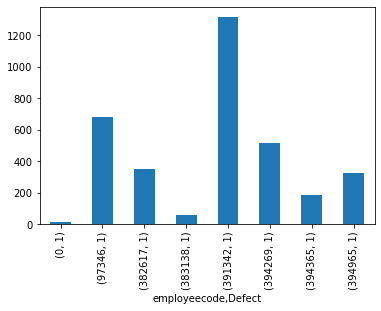

In [53]:
trainy.groupby(['employeecode'])['Defect'].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='employeecode,Defect'>

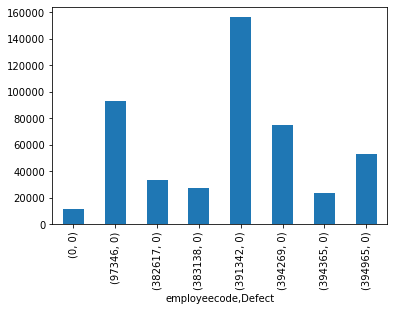

In [54]:
trainn.groupby(['employeecode'])['Defect'].value_counts().plot(kind = "bar")

## Conclusion
Employee number 382617 has efficiency 0.9897007613763796 <br />
Employee number 0 has efficiency 0.9987191529331397

Employee number 382617 has the least amount of welds in the time period and at the same time has the worse efficiency,
the best path for the company during the current recession would be to **lay off** the employee number 382617.
With 0.98 efficiency ;over a month where an employee welded 40,000 times on average he would contribute to **440** defects alone compared to the **top three performers** who combined would produce **400** defects only.

## Analysis of Operations

In [55]:
OpEff = operation_efficiency.to_frame()

In [56]:
OpEff.head(50)

Defect
operationnumber Defect        
30              0        15441
                1           32
40              0        47060
                1          199
180             0       116512
                1          891
240             0       294426
                1         2317

In [57]:
OpEff.columns = OpEff.columns.str.replace('Defect', 'DefectNum')

In [58]:
OpNum=[30,40,180,240]

In [59]:
j=0
for i in {30,40,180,240}:
    result=OpEff['DefectNum'][i][0].sum()/(OpEff['DefectNum'][i][0].sum()+OpEff['DefectNum'][i][1].sum())
    print("Operation Number ",OpNum[j],"has efficiency" ,result )
    j=j+1

Operation Number  30 has efficiency 0.9957891618527688
Operation Number  40 has efficiency 0.9921918966917501
Operation Number  180 has efficiency 0.9924107561135576
Operation Number  240 has efficiency 0.997931881341692


<AxesSubplot:xlabel='operationnumber,Defect'>

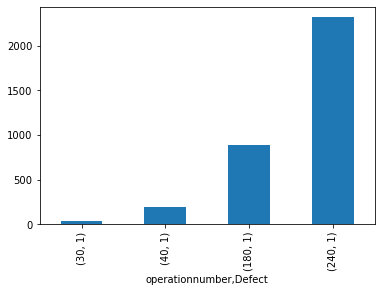

In [60]:
trainy.groupby(['operationnumber'])['Defect'].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='operationnumber,Defect'>

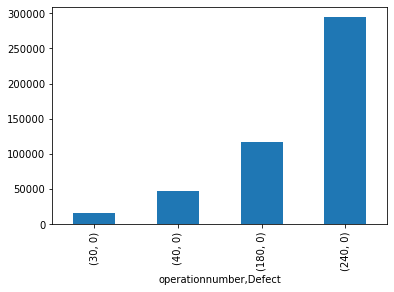

In [61]:
trainn.groupby(['operationnumber'])['Defect'].value_counts().plot(kind = "bar")

## Conclusion
Operation Number  180 has efficiency 0.9924107561135576; which is worse.<br/>
Operation Number  240 has efficiency 0.997931881341692; which is best.<br/>

As the number of operations increase the defects increase. Opeartion Number 40 has least efficiency although this might be attributed to the complexity of the operation to be performed

<br />

## Analysis of Production Codes

In [62]:
ProdEff = Production_efficiency.to_frame()

In [63]:
ProdEff.head(50)

Defect
Production Defect        
E10002436  0        26312
           1          160
E10002437  0        20748
           1           39
E15002881  0        45780
           1          455
E15002963  0        14838
           1          141
E15002965  0         9978
           1          175
E15002966  0        43886
           1          303
E15003056  0        10492
           1          125
E15003062  0        22593
           1          299
E15003200  0        40601
           1          289
E15003201  0        24251
           1          160
E15003202  0        49333
           1          274
E15003217  0        52846
           1          392
E15003219  0        28923
           1          214
E15003220  0        24477
           1           49
E150033027 0        42940
           1          332
E50006711  0        15441
           1           32

In [64]:
ProdEff.columns = ProdEff.columns.str.replace('Defect', 'DefectNum')

In [65]:
ProdNum=['E10002436','E10002437','E15002881','E15002963 ', 'E15002965'  ,'E15002966'  ,'E15003056'  ,
        'E15003062'   ,'E15003200'   ,'E15003201'   ,'E15003202'   ,'E15003217'   ,'E15003219'   ,'E15003220'   ,
         'E150033027'  ,'E50006711' ]

In [66]:
j=0
for i in {'E10002436','E10002437','E15002881',
'E15002963',  
'E15002965'   ,
'E15002966'  ,
'E15003056'  ,
'E15003062'   ,
'E15003200'   ,
'E15003201'   ,
'E15003202'   ,
'E15003217'   ,
'E15003219'   ,
'E15003220'   ,
'E150033027'  ,
'E50006711'}:
    result=ProdEff['DefectNum'][i][0].sum()/(ProdEff['DefectNum'][i][0].sum()+ProdEff['DefectNum'][i][1].sum())
    print("Production Number ",ProdNum[j],"has efficiency" ,result )
    j=j+1

Production Number  E10002436 has efficiency 0.9827637151580814
Production Number  E10002437 has efficiency 0.9901589704769115
Production Number  E15002881 has efficiency 0.9882264293114816
Production Number  E15002963  has efficiency 0.99812382739212
Production Number  E15002965 has efficiency 0.992636838348548
Production Number  E15002966 has efficiency 0.9905868215501702
Production Number  E15003056 has efficiency 0.9931430899092535
Production Number  E15003062 has efficiency 0.9926553866218211
Production Number  E15003200 has efficiency 0.997931881341692
Production Number  E15003201 has efficiency 0.9944765859656903
Production Number  E15003202 has efficiency 0.9934455778132809
Production Number  E15003217 has efficiency 0.986938668530491
Production Number  E15003219 has efficiency 0.9923276021445738
Production Number  E15003220 has efficiency 0.9980021201989725
Production Number  E150033027 has efficiency 0.9929322572756175
Production Number  E50006711 has efficiency 0.993955877908

<AxesSubplot:xlabel='Production,Defect'>

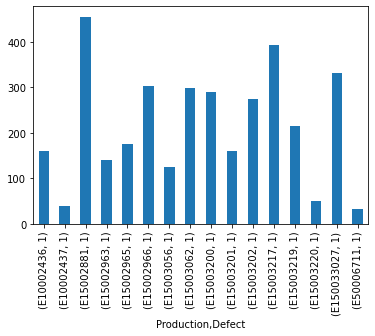

In [67]:
trainy.groupby(['Production'])['Defect'].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='Production,Defect'>

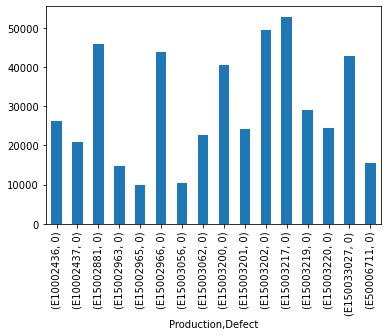

In [68]:
trainn.groupby(['Production'])['Defect'].value_counts().plot(kind = "bar")

## Conclusion
Production Number  E15002965 has efficiency 0.9827637151580814; which is worse while <br />
Production Number  E15002963  has efficiency 0.99812382739212; which is best

## Time Series Analysis

#### Analysing the number of defects in individual time slots in every day to find out if there are any optimal slots for minimising total defects

In [69]:
train3=train.copy()

In [70]:
train3["times"] = pd.to_datetime(train3["Time"].apply(lambda x: ":".join( "0"*(2-len(str(s))) + str(s) for s in x.split(":")[:-1]) ) , format="%H:%M:%S")
#converting our data to timeseries format to work with it more easily and generate deeper insights

In [71]:
train3["times"]

1        1900-01-01 10:44:10
2        1900-01-01 10:44:10
3        1900-01-01 10:44:11
4        1900-01-01 10:44:11
5        1900-01-01 10:44:12
                 ...        
568323   1900-01-01 09:09:07
568324   1900-01-01 09:09:07
568325   1900-01-01 09:09:08
568326   1900-01-01 09:09:08
568327   1900-01-01 09:09:09
Name: times, Length: 476878, dtype: datetime64[ns]

### Binning our data into slots of 1 hour each between 7:00 and 23:00 for analysing trends 

In [72]:
bins = [ i for i in range(7, 24, 1)]

# labels = ['07:00-09:59', '10:00-12:59', '13:00-15:59', '16:00-18:59', '19:00-21:59', '22:00-23:59']
# labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']

# add the bins to the dataframe
train3["timebin"] = pd.cut(train3["times"].dt.hour, bins, right=False)

In [73]:
import seaborn as sns

dategb = train3.groupby("date") #["timebin"].agg("sum")
dgb = []
dataa = []
for g in dategb.groups:
    g_temp = dategb.get_group(g).groupby("timebin")["Defect"].agg('sum')
    month = dategb.get_group(g)["month"].iloc[0]
    dgb.append((str(int(g))+'-'+str(month),g_temp))
print(dgb)
sorted_dgb = sorted(dgb, key=lambda x: int(x[0].split("-")[-1])*35 + int(x[0].split("-")[0]))
for d in sorted_dgb:
    dataa.append(d[1])

[('1-09', timebin
[7, 8)       5
[8, 9)      11
[9, 10)     11
[10, 11)     0
[11, 12)     0
[12, 13)     0
[13, 14)     0
[14, 15)     2
[15, 16)    31
[16, 17)    21
[17, 18)    64
[18, 19)    64
[19, 20)     6
[20, 21)    24
[21, 22)     0
[22, 23)     0
Name: Defect, dtype: int64), ('2-09', timebin
[7, 8)       0
[8, 9)       0
[9, 10)      1
[10, 11)    35
[11, 12)    13
[12, 13)     3
[13, 14)     9
[14, 15)     2
[15, 16)     0
[16, 17)     0
[17, 18)     0
[18, 19)     0
[19, 20)     0
[20, 21)     0
[21, 22)     0
[22, 23)     0
Name: Defect, dtype: int64), ('3-09', timebin
[7, 8)      13
[8, 9)      28
[9, 10)      0
[10, 11)    19
[11, 12)    23
[12, 13)    25
[13, 14)    24
[14, 15)    50
[15, 16)     2
[16, 17)     3
[17, 18)     3
[18, 19)     4
[19, 20)     0
[20, 21)     0
[21, 22)     0
[22, 23)     0
Name: Defect, dtype: int64), ('5-09', timebin
[7, 8)       0
[8, 9)      10
[9, 10)      8
[10, 11)     4
[11, 12)     2
[12, 13)     0
[13, 14)     1
[14, 15)     7
[15,

### Insight
On average 16:00 - 19:00 has more defects every day.
On further calculations its found out that this time period contributed to 60-150 more defects daily as compared to any other time period. 


In [74]:
dategb = train3.groupby("date") 
demgb = []
for g in dategb.groups:
    demgb.append(len(set(dategb.get_group(g)["employeecode"])))
    
print(demgb)

[2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2]


### A heatmap depicting the correlation between number of defects and the time bins

<AxesSubplot:>

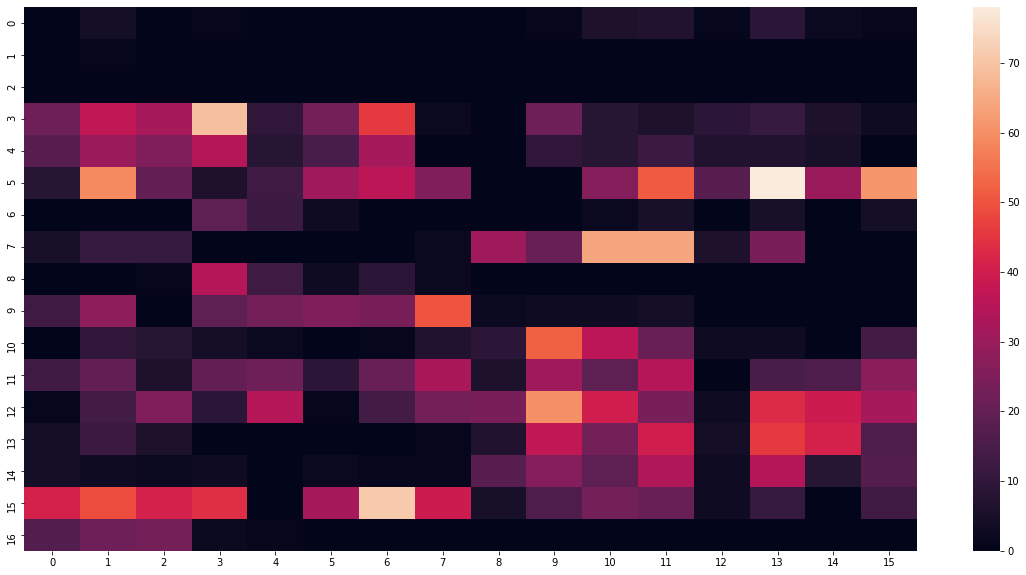

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))   
sns.heatmap(dataa,ax=ax)

## Conclusion:
**From the above heatmap we can infer that there is an abrupt increase in the number of defects in the time slots between 16:00-19:00hrs. This might be due to a number of reasons such as non optimum conditions for welding, machine fatigue during the time or poor employee performance during the time. The company can look into it and dig deeper to find out the actual reason and in turn greatly cut down on the losses due to welding in these time slots.**

## Return on Investment

In [76]:
trainn['Power']=abs(trainn['Voltage']*trainn['Current'])

/var/folders/56/8qxbxkps1g73zstry__01qrc0000gn/T/ipykernel_42318/3213961699.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
trainy['Power']=abs(trainy['Voltage']*trainy['Current'])

/var/folders/56/8qxbxkps1g73zstry__01qrc0000gn/T/ipykernel_42318/3753376997.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
trainn['Power'].sum()

34046045.22554001

In [79]:
trainy['Power'].sum()

578142.35524

Thus, 1.669% of power is consumed in production of defective pieces, thus an equal percentage of power cost.Similarly, labour cost and raw materials are wasted.Now, since this model predicts 60 percent of defects , the return on investment in this model is going to be decent over a large time frame and large factory data.

The company can see the following benefits if it chooses to go forward with our suggestions:
1. **Labour**:According to our calculations Employee Number 382617 is the least efficient; so much so that his defective work alone is more than that of the top three performers combined.<br/>
One replacing him with worker who is as efficient as average of top three performers the the company is expected to save 300-400 defects. Thus reducing the chance of catastrophic failure.<br/>
2. We found that most defects occur in the time period of **4PM to 7PM**. The company can use this insight to reduce defects during this time and this can
save upto 60 defects4 over a day.<br/>
So summing up after these insights the company saves 60 defects a day and 300-400 defects on the basis of employees.
So over a month (60*30+300=2100) that is more than **50% of defects** can be reduced.

# Overall Conclusion:
*Through our analysis of the given dataset we have identifed a few key trends and possible reasons that might be contributing to an increase in number of welding defects in the overall process. If we could dig deeper and analyse more data relevant to these buckets of issues, it is very likely we can improve upon welder performance and in turn reduce the number of defects.*